In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
import os
pdData = pd.read_csv('../../MachineLearning/Exercise 2/ex2/ex2data1.txt', header=None, names=['x1', 'x2', 'res'])
pdData.head()


,x1,x2,res
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [81]:
data.shape

(100, 4)

In [82]:
def plotData(X,y):
    postive =   X[(y == 1)]
    negative = X[(y==0)]
    
    fig,ax = plt.subplots(figsize = (10,5))
    ax.scatter(postive['x1'],postive['x2'],s=30,c='b',marker='o',label='postive')
    ax.scatter(negative['x1'],negative['x2'],s=30,c='r',marker='x',label='negative')
    ax.legend()
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')


* sigmoid : 映射到概率的函数
* model: 返回预测结果值
* cost : 根据参数计算损失
* gradient: 计算每个参数的梯度方向
* descent：进行参数更新
* accuracy: 计算精度


In [84]:
# sigmoid函数
def sigmoid(z):
    
    return 1/(1+np.exp(-z))

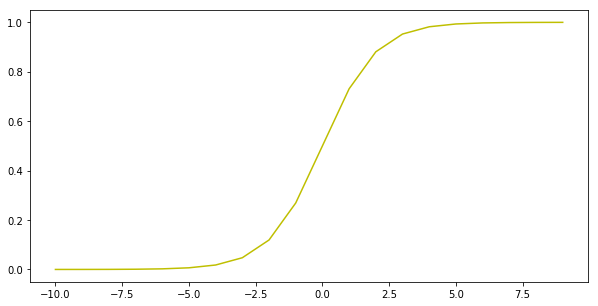

In [85]:
# sigmoid函数图
nums = np.arange(-10,10,1)
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(nums,sigmoid(nums),'y')

In [86]:
def model(x,theta):
    
    return sigmoid(np.dot(x,theta.T))

In [87]:
def cost(X,y,theta):
    m = len(y)
    left = np.multiply(-y,np.log(model(X,theta)))
    right = np.multiply(1-y,np.log(1-model(X,theta)))
    J = sum(left-right)/m
    
    return J

In [105]:
# #梯度下降
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X,theta) - y).ravel()
    for j in range(len(theta.ravel())): #for each parmeter
        term = np.multiply(error, X[:,j])
        grad[0, j] = np.sum(term) / len(X)
    
    return grad


In [89]:
pdData.insert(0, 'Ones', 1) # in a try / except structure so as not to return an error if the block si executed several times


# set X (training data) and y (target variable)
orig_data = pdData.values # convert the Pandas representation of the data to an array useful for further computations
cols = orig_data.shape[1]
X = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
#X = np.matrix(X.values)
#y = np.matrix(data.iloc[:,3:4].values) #np.array(y.values)
theta = np.zeros([1, 3])


In [90]:
# gradient descent
# 小批量梯度下降
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

# 停止策略
def stopCriterion(type,value,threshold):
    if type == STOP_ITER: return value > threshold
    elif type == STOP_COST: return abs(value[-1] - value[-2]) < threshold
    elif type == STOP_GRAD: return np.linalg.norm(value) < threshold
    

In [103]:
import numpy.random
# 洗牌
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:,0:cols-1]
    y = data[:,cols-1:]
    return X,y


In [95]:
import time

def descent(data, theta, batchSize, stopType, thresh, alpha):
    #梯度下降求解
    
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # batch
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape) # 计算的梯度
    costs = [cost(X, y, theta)] # 损失值

    
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize #取batch数量个数据
        if k >= n: 
            k = 0 
            X, y = shuffleData(data) #重新洗牌
        theta = theta - alpha*grad # 参数更新
        costs.append(cost(X, y, theta)) # 计算新的损失
        i += 1 

        if stopType == STOP_ITER:       value = i
        elif stopType == STOP_COST:     value = costs
        elif stopType == STOP_GRAD:     value = grad
        if stopCriterion(stopType, value, thresh): break
    
    return theta, i-1, costs, grad, time.time() - init_time

            
        

In [93]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    #import pdb; pdb.set_trace();
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
#     print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

array([[-0.00027127,  0.00705232,  0.00376711]])

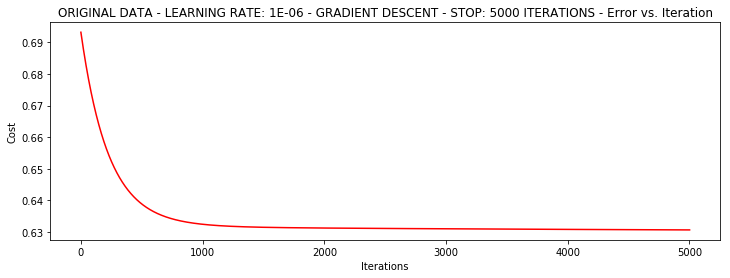

In [106]:
n=100
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

array([[-5.13364014,  0.04771429,  0.04072397]])

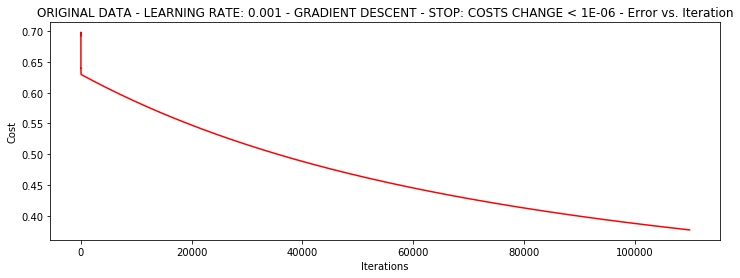

In [108]:
runExpe(orig_data, theta, n, STOP_COST, thresh=0.000001, alpha=0.001)

ValueError: shapes (100,2) and (3,1) not aligned: 2 (dim 1) != 3 (dim 0)

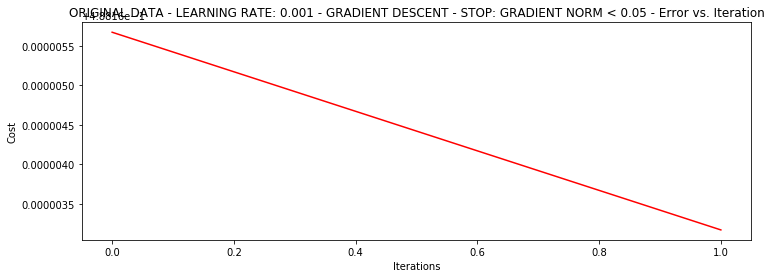

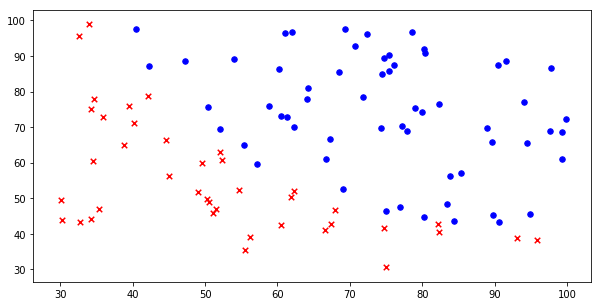

In [118]:
theta = runExpe(orig_data, theta, n, STOP_GRAD, thresh=0.05, alpha=0.001)
def plotData(data,theta):
    y = data['res']
    X = data[['x1','x2']]
    postive =   X[(y == 1)]
    negative = X[(y==0)]
    
    fig,ax = plt.subplots(figsize = (10,5))
    ax.scatter(postive['x1'],postive['x2'],s=30,c='b',marker='o',label='postive')
    ax.scatter(negative['x1'],negative['x2'],s=30,c='r',marker='x',label='negative')
    ax.plot(model(X,theta))
    ax.legend()
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
  
plotData(data,theta)

    